# Шаг 1. Обзор данных.
Перед нами данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. В таблице указаны стандартные данные пользователей как цена квартиры, площадь, этаж, цена, так и данные сгенерированные автоматически. Рассмотрим эти данные.

In [36]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import data_table

data_table.enable_dataframe_formatter()

try:
  df = pd.read_csv('drive/MyDrive/datasets/real_estate_data.csv', sep='\t')
except:
  df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12151,18,4990000.0,67.0,2018-04-04T00:00:00,2,NaN,6.0,30.0,3,NaN,...,20.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,149.0
23356,8,4600000.0,61.0,2018-04-03T00:00:00,3,2.60,9.0,43.5,9,NaN,...,6.5,1.0,Санкт-Петербург,13744.0,14822.0,1.0,425.0,0.0,NaN,51.0
4809,2,4100000.0,53.0,2019-01-10T00:00:00,2,2.50,5.0,28.0,2,NaN,...,8.0,2.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
10625,20,3549000.0,32.8,2017-11-11T00:00:00,1,2.60,20.0,14.3,10,NaN,...,8.5,2.0,Санкт-Петербург,39141.0,15985.0,0.0,NaN,0.0,NaN,192.0
15406,3,4433484.0,60.7,2017-03-21T00:00:00,2,2.75,24.0,32.0,17,NaN,...,11.9,NaN,Санкт-Петербург,22212.0,17399.0,0.0,NaN,1.0,233.0,255.0
15541,0,1570000.0,50.0,2017-04-25T00:00:00,2,2.95,2.0,32.9,2,NaN,...,7.0,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,288.0
13076,9,1200000.0,30.0,2017-12-15T00:00:00,1,2.60,4.0,24.0,4,NaN,...,6.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,188.0
19210,7,7150000.0,56.6,2018-04-04T00:00:00,2,3.00,5.0,37.0,4,NaN,...,8.0,1.0,Санкт-Петербург,11027.0,10659.0,2.0,500.0,0.0,NaN,24.0
8461,9,7850000.0,74.3,2015-04-10T00:00:00,3,NaN,11.0,42.3,6,NaN,...,11.6,0.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,702.0
9775,8,8000000.0,71.3,2016-06-04T00:00:00,2,2.95,7.0,46.1,4,NaN,...,8.0,0.0,Санкт-Петербург,10708.0,10057.0,2.0,63.0,0.0,NaN,26.0


In [37]:
print(df.shape)

print(df.columns)

(23699, 22)
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Вывод
Файл с данным содержит 22 столбца (2 булевых, 3 целочисленных, 14 столбцов с плавающей точкой и 3 столбца с объектами) и 23699 записей.

В 14 из 22 столбцов есть пропущенные значения. Нужно понять какие данные пропущены случайно, какие записаны некорректно и какие пропуски можно игнорировать.

Названия столбцов и их порядок записан не лучшем образом. Их лучше переопределить.

В некоторых столбцах, например, floors_total и balcony имеют число с плавающей точной, а должны быть целочисленными. Проверим это.




# Шаг 2. Обработка данных

In [39]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [40]:
#приведем названия к snake_case 
df = df.rename(columns={
    "cityCenters_nearest": "city_сenters_nearest",
    "parks_around3000": "parks_around_3000",
    "ponds_around3000": "ponds_around_3000",
    "is_apartment": "apartment"
})

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## Проверка на пропуски и аномалии, изменение типов данных
В таблице присутствуют пропуски и аномалии. Необходимо определить насколько они критичные.

In [41]:
#проверка столбца 'total_images'
df['total_images'].unique()
#в целом данные выглядят адекватно

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [42]:
#приведем столбец 'last_price' к целочисленным значениям
df['last_price'] = df['last_price'].astype('int')

In [43]:
#Изменим большие цифры в last_price на миллионы
df['last_price'] = df['last_price']/1000000

In [44]:
#Переведем столбец first_day_exposition в тип данных datetime 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [45]:
#проверим на пропуски
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_сenters_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
apartment               20924
dtype: int64

In [46]:
#и в процентах
df.isnull().sum().sort_values()/df.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around_3000       23.283683
parks_around_3000       23.283683
city_сenters_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
apartment               88.290645
dtype: float64

Все основные данные заполнены полностью. Пропуски в колонках 'apartment' и 'balcony' скорей всего связаны с отсутствием балкон и помещение не является апартаментами. Заменим пропущенные значения на апартаментов на False, а балконов на 0.

In [47]:
df['apartment']=df['apartment'].fillna(False)
df['balcony']=df['balcony'].fillna(0)

In [48]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images             0.000000
balcony                  0.000000
open_plan                0.000000
apartment                0.000000
floor                    0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
parks_around_3000       23.283683
ponds_around_3000       23.283683
city_сenters_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
ponds_nearest           61.559559
parks_nearest           65.909954
dtype: float64

Удалим строки без города, они будут мешать в анализе и даже пользователям такие объявления не нужны, не понятно, где эта квартира.

In [49]:
df = df.dropna(subset=['locality_name'])
df['apartment'].unique()


array([False,  True])

In [50]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images             0.000000
locality_name            0.000000
balcony                  0.000000
open_plan                0.000000
apartment                0.000000
floor                    0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
floors_total             0.359408
living_area              8.025370
kitchen_area             9.594080
days_exposition         13.446089
parks_around_3000       23.298097
ponds_around_3000       23.298097
city_сenters_nearest    23.302326
airports_nearest        23.399577
ceiling_height          38.731501
ponds_nearest           61.585624
parks_nearest           65.902748
dtype: float64

In [51]:
df['studio'].unique()

array([False,  True])

In [52]:
df['open_plan'].unique()

array([False,  True])

In [53]:
df.columns.to_list()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_сenters_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

Переведем в километры расстояние до парков, аэропортов и центра города.

In [54]:
df['city_сenters_nearest_km'] = df['city_сenters_nearest'] / 1000
df['airports_nearest_km'] = df['airports_nearest'] / 1000
df['parks_around_3_km'] = df['parks_around_3000'] / 1000
df['nearest_parks_km'] = df['parks_nearest'] / 1000
df['ponds_around_3_km'] = df['ponds_around_3000'] / 1000
df['nearest_pond_km'] = df['ponds_nearest'] / 1000

del df['city_сenters_nearest']
del df['airports_nearest']
del df['parks_around_3000']
del df['parks_nearest']
del df['ponds_around_3000']
del df['ponds_nearest']

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,days_exposition,city_сenters_nearest_km,airports_nearest_km,parks_around_3_km,nearest_parks_km,ponds_around_3_km,nearest_pond_km
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,NaN,16.028,18.863,0.001,0.482,0.002,0.755
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,81.0,18.603,12.817,0.000,NaN,0.000,NaN
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,558.0,13.933,21.741,0.001,0.090,0.002,0.574
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,424.0,6.800,28.098,0.002,0.084,0.003,0.234
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,121.0,8.098,31.856,0.002,0.112,0.001,0.048


## Вывод
Таблицу обработали, пропуски либо заменили, либо удалили. Данные в строках привили в удобный вид.

# Шаг 3.  Добавим данные в таблицу.  

## Добавим цену за квадратный метр.

In [55]:
df['price_per_meter'] = (df['last_price']/df['total_area'])
df['price_per_meter']

0        0.120370
1        0.082921
2        0.092786
3        0.408176
4        0.100000
           ...   
23694    0.072491
23695    0.052542
23696    0.044092
23697    0.149511
23698    0.041796
Name: price_per_meter, Length: 23650, dtype: float64

## Добавим день недели, месяц и год публикации.

In [56]:
df['published_day'] = df['first_day_exposition'].dt.weekday
df['published_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['published_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,city_сenters_nearest_km,airports_nearest_km,parks_around_3_km,nearest_parks_km,ponds_around_3_km,nearest_pond_km,price_per_meter,published_day,published_month,published_year
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16.028,18.863,0.001,0.482,0.002,0.755,0.120370,3,3,2019
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18.603,12.817,0.000,NaN,0.000,NaN,0.082921,1,12,2018
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13.933,21.741,0.001,0.090,0.002,0.574,0.092786,3,8,2015
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6.800,28.098,0.002,0.084,0.003,0.234,0.408176,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8.098,31.856,0.002,0.112,0.001,0.048,0.100000,1,6,2018


## Добавим этаж квартиры (первый, последний, другой).

In [57]:
def floor_table(floor,floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

df['floor_is'] = df.apply(lambda x: floor_table(x.floor, x.floors_total), axis=1)

df['floor_is']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_is, Length: 23650, dtype: object

## Добавим соотношение жилой и общей площади.

In [58]:
df['ratio_area'] = df['living_area']/df['total_area']
df['ratio_kitchen'] = df['kitchen_area']/df['total_area']

df['ratio_area']

0        0.472222
1        0.460396
2        0.612500
3             NaN
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697         NaN
23698    0.380805
Name: ratio_area, Length: 23650, dtype: float64

In [59]:
df['ratio_kitchen']

0        0.231481
1        0.272277
2        0.148214
3             NaN
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696         NaN
23697    0.303583
23698    0.278638
Name: ratio_kitchen, Length: 23650, dtype: float64

# Шаг 4. Проведем исследовательский анализ данных.


##Изучим параметры по отдельности
Построим гистограммы с помощью цикла параметров цены, площади, 
кол-во комнат, высоты потолков и времени продажи

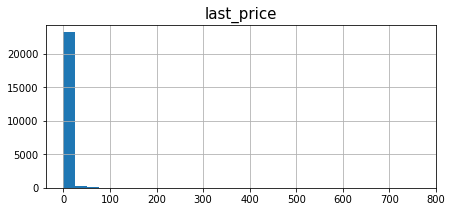

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64


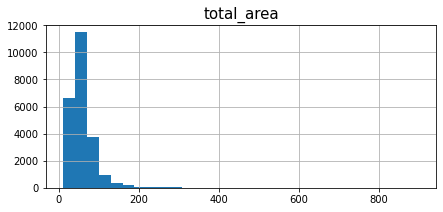

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


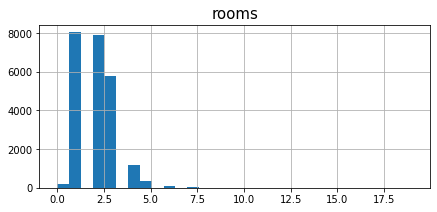

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


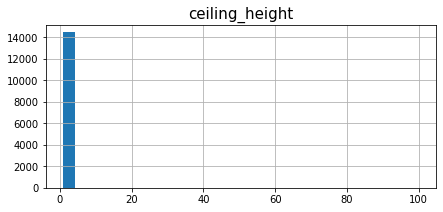

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


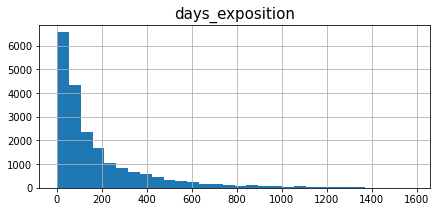

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [60]:
for columns in df[['last_price','total_area','rooms','ceiling_height','days_exposition']]:
    range_max = df[columns].max()
    range_min = df[columns].min()
    df[columns].hist(bins=30, range=(range_min, range_max), figsize=(7,3))
    plt.title(columns, fontsize=15)
    plt.show()
    print(df[columns].describe())

In [61]:
df['last_price'].describe()

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

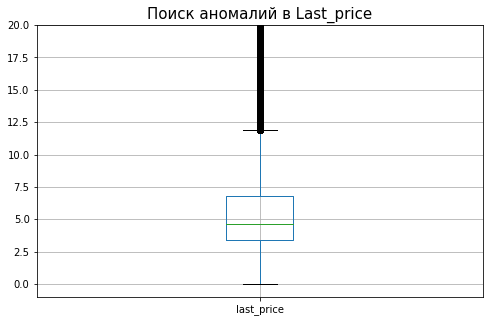

In [62]:
plt.figure(figsize=(8, 5))
df.boxplot(column='last_price')
plt.title('Поиск аномалий в Last_price', fontsize=15)
plt.ylim(-1, 20)
plt.show()    

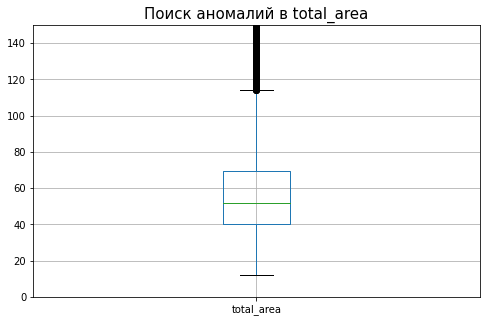

In [63]:
plt.figure(figsize=(8, 5))
df.boxplot(column='total_area')
plt.title('Поиск аномалий в total_area', fontsize=15)
plt.ylim(0, 150)
plt.show() 

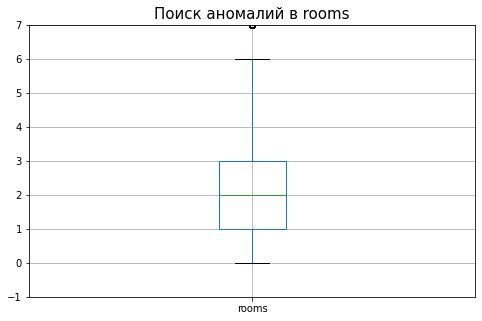

In [64]:
#Поиск аномалий с boxplot в столбце rooms
plt.figure(figsize=(8, 5))
df.boxplot(column='rooms')
plt.title('Поиск аномалий в rooms', fontsize=15)
plt.ylim(-1, 7)
plt.show()

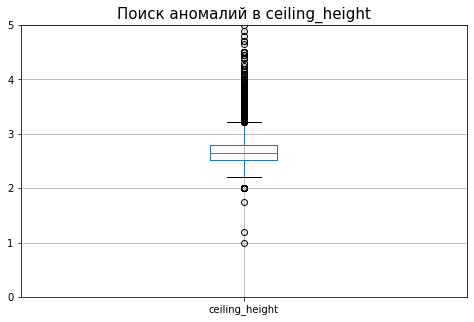

In [65]:
#Поиск аномалий с boxplot в столбце ceiling_height
plt.figure(figsize=(8, 5))
df.boxplot(column='ceiling_height')
plt.title('Поиск аномалий в ceiling_height', fontsize=15)
plt.ylim(0, 5)
plt.show()  

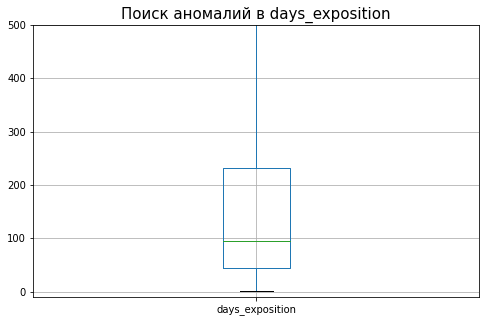

In [66]:
#Поиск аномалий с boxplot в столбце days_exposition
plt.figure(figsize=(8, 5))
df.boxplot(column='days_exposition')
plt.title('Поиск аномалий в days_exposition', fontsize=15)
plt.ylim(-10,500)
plt.show()

In [67]:
#Проведем срезы по нашим таблицам исходя из аномалий и сразу
#посчитаем процент данных, которые мы срезали

last_price_slice = df.query('1 <= last_price <= 10')
last_price_slice_percent = (last_price_slice.count() / df['last_price'].count())

total_area_slice = df.query('10 <= total_area <= 110')
total_area_slice_percent = (total_area_slice.count() / df['total_area'].count())

rooms_slice = df.query('1 <= rooms <= 6')
rooms_slice_percent = (rooms_slice.count() / df['rooms'].count())

ceiling_height_slice = df.query('2 < ceiling_height < 3')
ceiling_height_slice_percent = (ceiling_height_slice.count() / df['ceiling_height'].count())

days_exposition_slice = df.query('22 <= days_exposition <= 450 ')
days_exposition_slice_percent = (days_exposition_slice.count() / df['days_exposition'].count())

In [68]:
print('Под срез со столбца last_price ушло данных: {:.0%}'.format(last_price_slice_percent['last_price']))
print('Под срез со столбца total_area ушло данных: {:.0%}'.format(total_area_slice_percent['total_area']))
print('Под срез со столбца rooms ушло данных: {:.0%}'.format(rooms_slice_percent['rooms']))
print('Под срез со столбца ceiling_height ушло данных: {:.0%}'.format(ceiling_height_slice_percent['ceiling_height']))
print('Под срез со столбца days_exposition ушло данных: {:.0%}'.format(days_exposition_slice_percent['days_exposition']))

Под срез со столбца last_price ушло данных: 88%
Под срез со столбца total_area ушло данных: 94%
Под срез со столбца rooms ушло данных: 99%
Под срез со столбца ceiling_height ушло данных: 82%
Под срез со столбца days_exposition ушло данных: 77%


Цена квартиры в среднем - 6 миллионов рублей, площадь - 60 кв. метров, с двумя комнатами и высотой полков 2.6 метров.
Быстрая продажа квартиры занимает до 22 дней. Средняя продажа занимает от 22 дней до 200 дней. То, что больше - долгая продажа.


##Факторы, влияющие на цену квартиры


###Площадь квартиры
Посмотрим, как влияет размер площади на цену квартиры

Text(0.5, 1.0, 'Как размер площади влияет на цену квартиры')

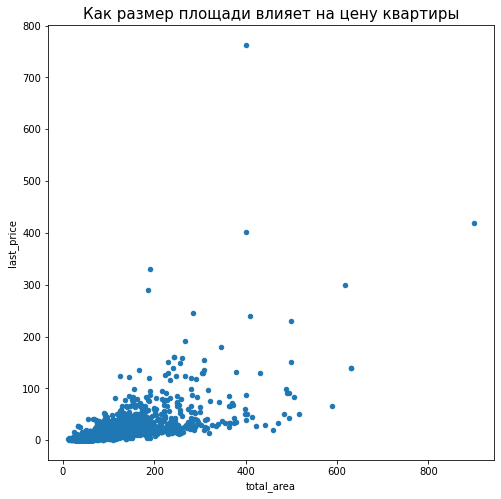

In [72]:
df.plot(y='last_price',x='total_area',kind='scatter', figsize=(8,8))
plt.title('Как размер площади влияет на цену квартиры', fontsize=15)

Корреляция заметна. Чем больше площадь, тем больше цена.

###Удаленность от центра
Как влияет удаленность от на цену квартиры

In [76]:
df.columns.to_list()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'days_exposition',
 'city_сenters_nearest_km',
 'airports_nearest_km',
 'parks_around_3_km',
 'nearest_parks_km',
 'ponds_around_3_km',
 'nearest_pond_km',
 'price_per_meter',
 'published_day',
 'published_month',
 'published_year',
 'floor_is',
 'ratio_area',
 'ratio_kitchen']

Text(0.5, 1.0, 'Как расстояние до центра влияет на цену квартиры')

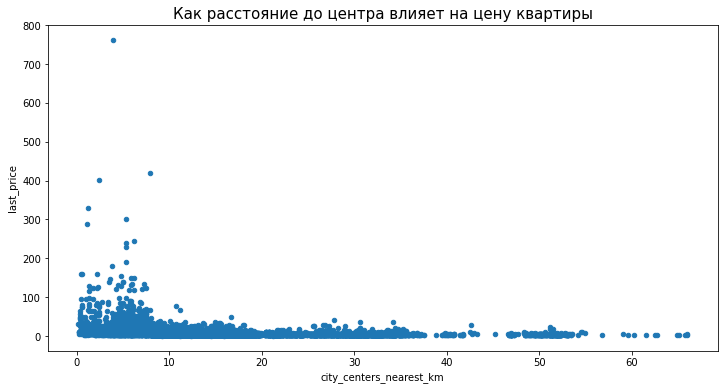

In [77]:
df.plot(y='last_price',x='city_сenters_nearest_km',kind='scatter', figsize=(12,6))
plt.title('Как расстояние до центра влияет на цену квартиры', fontsize=15)


Корреляция есть. Чем квартира ближе к центру, тем она дороже.

###Этаж

In [86]:
selling_floors=pd.pivot_table(df, index='floor_is', values='last_price', aggfunc='mean')

selling_floors

,last_price
floor_is,
другой,6.675825
первый,4.800465
последний,7.359138


Text(0.5, 1.0, 'Квартира на каком этаже стоит дороже/дешевле')

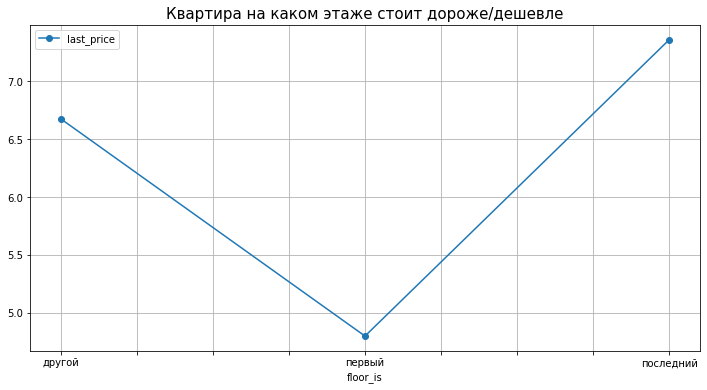

In [92]:
selling_floors.plot(y='last_price',style='o-', grid=True, figsize=(12,6))
plt.title('Квартира на каком этаже стоит дороже/дешевле', fontsize=15)

Зависимость есть. Квартиры на первом этаже дешевле всех. С ростом этажа растет и цен а, за квадратный метр.

###Год размещения
Посмотрим, если ли зависимость цены на квадратный метр от года размещения.

In [93]:
#Посмотрим как менялась цена в разные года
selling_year=pd.pivot_table(df, index='published_year', values='price_per_meter')
selling_year.sort_values(by='price_per_meter', ascending=False)

,price_per_meter
published_year,
2014,0.124302
2019,0.107124
2015,0.104719
2016,0.098295
2018,0.097800
2017,0.097637


Text(0.5, 1.0, 'Зависимость от года размещения на цену квартиры')

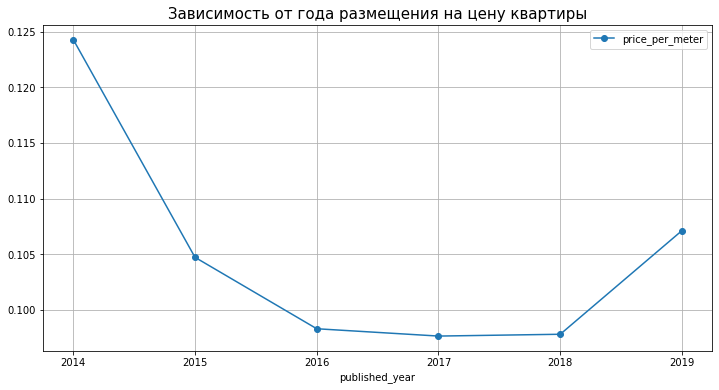

In [94]:
selling_year.plot(y='price_per_meter',style='o-', grid=True, figsize=(12,6))
plt.title('Зависимость от года размещения на цену квартиры', fontsize=15)

Зависимость очевидна. В 2016 - 2018 цены за квадратный метр были значительно ниже, что свидетельствует о "проседании" рынка недвижимости в Санкт-Петербурге.

#Шаг 5. Общий вывод

Проанализировав вводные данные, я проверил их на пропуски и аномалии. Пропуски заполнил недостающими значениями, удалил или оставил как есть если это было уместно. Изменил типы данных в столбцах где это было необходимо.

Далее я посчитал и добавил в таблицу цену квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры, соотношение жилой и общей площади.

Проведя исследовательский анализ, я выяснил, что средняя стоимость квартиры составляет 6 миллионов рублей, средняя площадь - 60 кв. м, количество комнат - две, а высота потолков - 2.6 м. Цена квартиры напрямую зависит от ее площади и удаленности от центра. Цена квадратного метра ниже всего на первом этаже. В 2016 - 2018 годах наблюдался спад покупательной активности на рынке недвижимости.